In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

In [ ]:
np.random.seed(42)
rows = 1500
df = pd.DataFrame({
    "Gender": np.random.choice(["Male", "Female"], rows),
    "SeniorCitizen": np.random.choice([0, 1], rows),
    "Tenure": np.random.randint(1, 72, rows),
    "MonthlyCharges": np.random.randint(100, 500, rows),
    "InternetService": np.random.choice(["DSL", "Fiber", "None"], rows),
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], rows),
    "TechSupport": np.random.choice(["Yes", "No"], rows),
    "PaymentMethod": np.random.choice(["Online", "Bank Transfer", "Credit Card"], rows),
    "Churn": np.random.choice([0, 1], rows,
              p=[0.7, 0.3])
})

In [ ]:
print("Sample Synthesized Dataset:")
print(df.head())

Sample Synthesized Dataset:
   Gender  SeniorCitizen  Tenure  MonthlyCharges InternetService  \
0    Male              0      48             173             DSL   
1  Female              1      66             135             DSL   
2    Male              1      70             200            None   
3    Male              0      28             255           Fiber   
4    Male              0      26             354             DSL   

         Contract TechSupport PaymentMethod  Churn  
0        Two year         Yes        Online      0  
1        Two year         Yes        Online      0  
2        One year         Yes        Online      1  
3        One year          No        Online      0  
4  Month-to-month          No   Credit Card      0  


In [ ]:
encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=120),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [ ]:
if xgb_available:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False, eval_metric='logloss')

In [ ]:
results = {}

In [ ]:
for name, model in models.items():
    print("\n===========")
    print("Training:", name)
    print("===========")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, preds))


Training: Random Forest
Accuracy: 0.7333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       228
           1       0.32      0.10      0.15        72

    accuracy                           0.73       300
   macro avg       0.54      0.52      0.50       300
weighted avg       0.66      0.73      0.68       300


Training: Gradient Boosting
Accuracy: 0.7533333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       228
           1       0.43      0.08      0.14        72

    accuracy                           0.75       300
   macro avg       0.60      0.52      0.50       300
weighted avg       0.69      0.75      0.68       300


Training: AdaBoost
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       228
           1       0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/xgboost/t

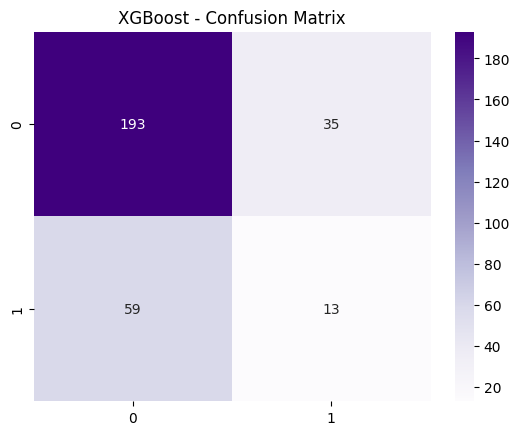

In [ ]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title(f"{name} - Confusion Matrix")
plt.show()

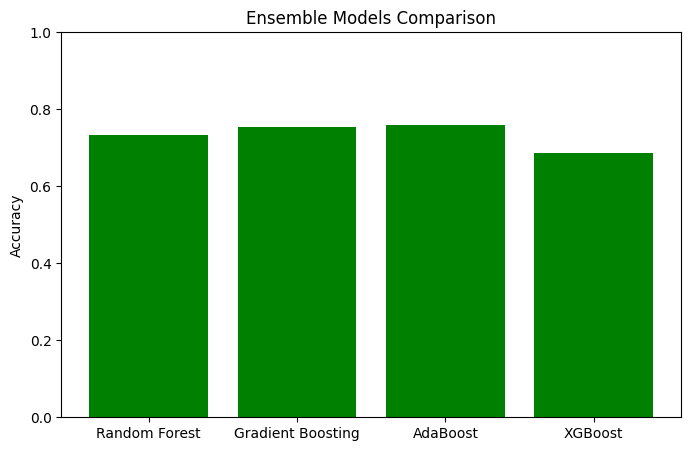

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='green')
plt.ylabel("Accuracy")
plt.title("Ensemble Models Comparison")
plt.ylim(0,1)
plt.show()


In [ ]:
print("\nFinal Accuracies:", results)



Final Accuracies: {'Random Forest': 0.7333333333333333, 'Gradient Boosting': 0.7533333333333333, 'AdaBoost': 0.76, 'XGBoost': 0.6866666666666666}
